# Implementation of Neural Network for Classification Problem
#### Design a neural network for prediction of diabetes using keras library and pima-indians-diabetes dataset.

In [51]:
from keras.models import Sequential
from keras.layers import Dense
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.preprocessing import scale
from sklearn.metrics import accuracy_score
from sklearn.model_selection import train_test_split

In [52]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [53]:
df = pd.read_csv('/content/drive/My Drive/Colab Notebooks/Deep Learning Sem 7/pima-indians-diabetes.csv', header=None)
df.head()

,0,1,2,3,4,5,6,7,8
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


In [54]:
X = df.iloc[:,0:8]
y = df.iloc[:,8]

In [55]:
X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=0.75)

# define the keras model

In [93]:
model = Sequential()
model.add(Dense(16, activation='relu'))
model.add(Dense(32, activation='relu'))
model.add(Dense(32, activation='relu'))
model.add(Dense(16, activation='relu'))
model.add(Dense(8, activation='relu'))
model.add(Dense(1, activation='sigmoid'))

# compiling the keras model

In [94]:
model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])

# training the keras model on the dataset

In [99]:
model_history = model.fit(X_train, y_train, epochs=500)

Epoch 1/500
18/18 [==============================] - 0s 6ms/step - loss: 0.3948 - accuracy: 0.8003
Epoch 2/500
18/18 [==============================] - 0s 7ms/step - loss: 0.4007 - accuracy: 0.8038
Epoch 3/500
18/18 [==============================] - 0s 8ms/step - loss: 0.3902 - accuracy: 0.8194
Epoch 4/500
18/18 [==============================] - 0s 7ms/step - loss: 0.4315 - accuracy: 0.7847
Epoch 5/500
18/18 [==============================] - 0s 9ms/step - loss: 0.4144 - accuracy: 0.7951
Epoch 6/500
18/18 [==============================] - 0s 7ms/step - loss: 0.3875 - accuracy: 0.8212
Epoch 7/500
18/18 [==============================] - 0s 7ms/step - loss: 0.3840 - accuracy: 0.8264
Epoch 8/500
18/18 [==============================] - 0s 6ms/step - loss: 0.3842 - accuracy: 0.8212
Epoch 9/500
18/18 [==============================] - 0s 6ms/step - loss: 0.3902 - accuracy: 0.8194
Epoch 10/500
18/18 [==============================] - 0s 6ms/step - loss: 0.4103 - accuracy: 0.7899
Epoch 11/

# evaluating the keras model

In [100]:
_, accuracy = model.evaluate(X_train, y_train)
print(f'Accuracy: {accuracy*100}')

18/18 [==============================] - 0s 2ms/step - loss: 0.1688 - accuracy: 0.9271
Accuracy: 92.70833134651184


In [101]:
y_pred = model.predict(X_test)
y_pred = np.argmax(y_pred, axis=1)
accuracy_score(y_test, y_pred)

6/6 [==============================] - 0s 2ms/step


0.6822916666666666

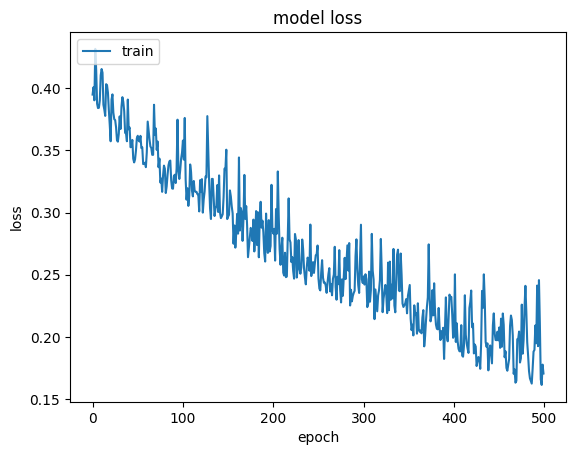

In [102]:
# summarize history for loss
plt.plot(model_history.history['loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

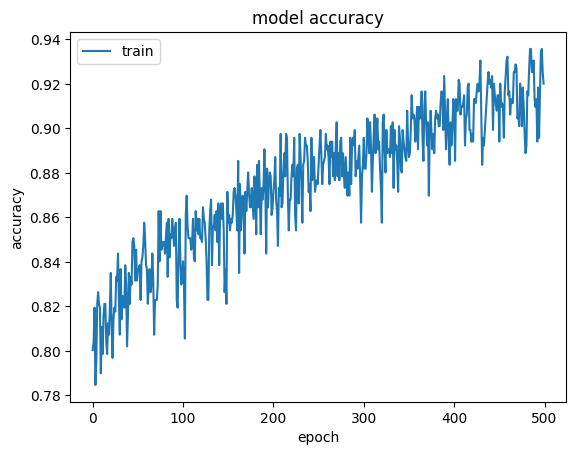

In [103]:
# summarize history for accuracy
plt.plot(model_history.history['accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()